In [1]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

#make compatible with Python 2 and Python 3
from __future__ import print_function, division, absolute_import 

In [2]:
import numpy as np
import pandas as pd   
#uploading a small data to work with
df = pd.read_csv('prideNprejudice.csv',delimiter="\t")
df.head()

,sentences
0,"It is a truth universally acknowledged, that a..."
1,"""My dear Mr. Bennet,"" said his lady to him one..."
2,Bennet replied that he had not.
3,"""But it is,"" returned she; ""for Mrs. Long has ..."
4,Bennet made no answer.


In [3]:
# import packages

import bs4 as bs
import nltk
nltk.download('all')
from nltk.tokenize import sent_tokenize # tokenizes sentences
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

eng_stopwords = stopwords.words('english')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/ran/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /Users/ran/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/ran/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /Users/ran/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/ran/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/ran/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to
[nltk_data]    |     /Users/ran/nltk_data

[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     /Users/ran/nltk_data...
[nltk_data]    |   Package state_union is already up-to-date!
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     /Users/ran/nltk_data...
[nltk_data]    |   Package stopwords is already up-to-date!
[nltk_data]    | Downloading package subjectivity to
[nltk_data]    |     /Users/ran/nltk_data...
[nltk_data]    |   Package subjectivity is already up-to-date!
[nltk_data]    | Downloading package swadesh to
[nltk_data]    |     /Users/ran/nltk_data...
[nltk_data]    |   Package swadesh is already up-to-date!
[nltk_data]    | Downloading package switchboard to
[nltk_data]    |     /Users/ran/nltk_data...
[nltk_data]    |   Package switchboard is already up-to-date!
[nltk_data]    | Downloading package timit to /Users/ran/nltk_data...
[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading p

In [4]:
# 1. 
from nltk.corpus import stopwords
from nltk.util import ngrams


ps = PorterStemmer()
wnl = WordNetLemmatizer()

def review_cleaner(review,lemmatize=True,stem=False):
    '''
    Clean and preprocess a review.

    1. Remove HTML tags
    2. Use regex to remove all special characters (only keep letters)
    3. Make strings to lower case and tokenize / word split reviews
    4. Remove English stopwords
    5. Rejoin to one string
    '''
    ps = PorterStemmer()
    wnl = WordNetLemmatizer()
    #1. Remove HTML tags
    review = bs.BeautifulSoup(review).text

    
    #2. Remove punctuation
    review = re.sub("[^a-zA-Z]", " ",review)
    
    #3. Tokenize into words (all lower case)
    review = review.lower().split()
    
    #4.Set stopwords
    eng_stopwords = set(stopwords.words("english"))

    clean_review=[]
    for word in review:
        if word not in eng_stopwords:
            if lemmatize is True:
                word=wnl.lemmatize(word)
            elif stem is True:
                if word == 'oed':
                    continue
                word=ps.stem(word)
            clean_review.append(word)
    return(clean_review)

In [5]:
num_reviews = len(df['sentences'])

review_clean_original = []

for i in range(0,num_reviews):
    if( (i+1)%179 == 0 ):
        # print progress
        print("Done with %d reviews" %(i+1)) 
    review_clean_original.append(review_cleaner(df['sentences'][i]))

Done with 179 reviews
Done with 358 reviews
Done with 537 reviews
Done with 716 reviews
Done with 895 reviews
Done with 1074 reviews
Done with 1253 reviews
Done with 1432 reviews
Done with 1611 reviews
Done with 1790 reviews
Done with 1969 reviews
Done with 2148 reviews
Done with 2327 reviews
Done with 2506 reviews
Done with 2685 reviews
Done with 2864 reviews
Done with 3043 reviews
Done with 3222 reviews
Done with 3401 reviews
Done with 3580 reviews
Done with 3759 reviews
Done with 3938 reviews
Done with 4117 reviews
Done with 4296 reviews
Done with 4475 reviews
Done with 4654 reviews
Done with 4833 reviews
Done with 5012 reviews
Done with 5191 reviews
Done with 5370 reviews


In [6]:
df['sentences'][0]

'It is a truth universally acknowledged, that a single man in possessionof a good fortune, must be in want of a wife.However little known the feelings or views of such a man may be on hisfirst entering a neighbourhood, this truth is so well fixed in the mindsof the surrounding families, that he is considered the rightful propertyof some one or other of their daughters.'

In [7]:
review_clean_original[0]

['truth',
 'universally',
 'acknowledged',
 'single',
 'man',
 'possessionof',
 'good',
 'fortune',
 'must',
 'want',
 'wife',
 'however',
 'little',
 'known',
 'feeling',
 'view',
 'man',
 'may',
 'hisfirst',
 'entering',
 'neighbourhood',
 'truth',
 'well',
 'fixed',
 'mindsof',
 'surrounding',
 'family',
 'considered',
 'rightful',
 'propertyof',
 'one',
 'daughter']

In [8]:
len(review_clean_original)

5370

In [9]:
#!pip install gensim

#ref: https://radimrehurek.com/gensim/models/word2vec.html

In [10]:
sentences=review_clean_original
# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # ignore all words with total frequency lower than this                       
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    

# Initialize and train the model (this will take some time)
from gensim.models import word2vec

print("Training word2vec model... ")
model = word2vec.Word2Vec(sentences, workers=num_workers, \
           size=num_features, min_count = min_word_count, \
            window = context)

# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

Training word2vec model... 


In [11]:
# Get vocabulary count of the model
vocab_tmp = list(model.wv.vocab)
print('Vocab length:',len(vocab_tmp))

Vocab length: 234


In [12]:
# Get Vocabulary words
vocab_tmp[0]

'man'

In [13]:
from gensim.models import Word2Vec
# Load the trained modelNumeric Representations of Words
model = Word2Vec.load("300features_40minwords_10context")

In [14]:
type(model.wv.syn0)

numpy.ndarray

In [15]:
model.wv.syn0.shape

(234, 300)

In [16]:
model.corpus_count

5370

In [17]:
# Get vocabulary count of the model
vocab_tmp = list(model.wv.vocab)
print('Vocab length:',len(vocab_tmp))

# Get distributional representation of each word
X = model[vocab_tmp]


Vocab length: 234


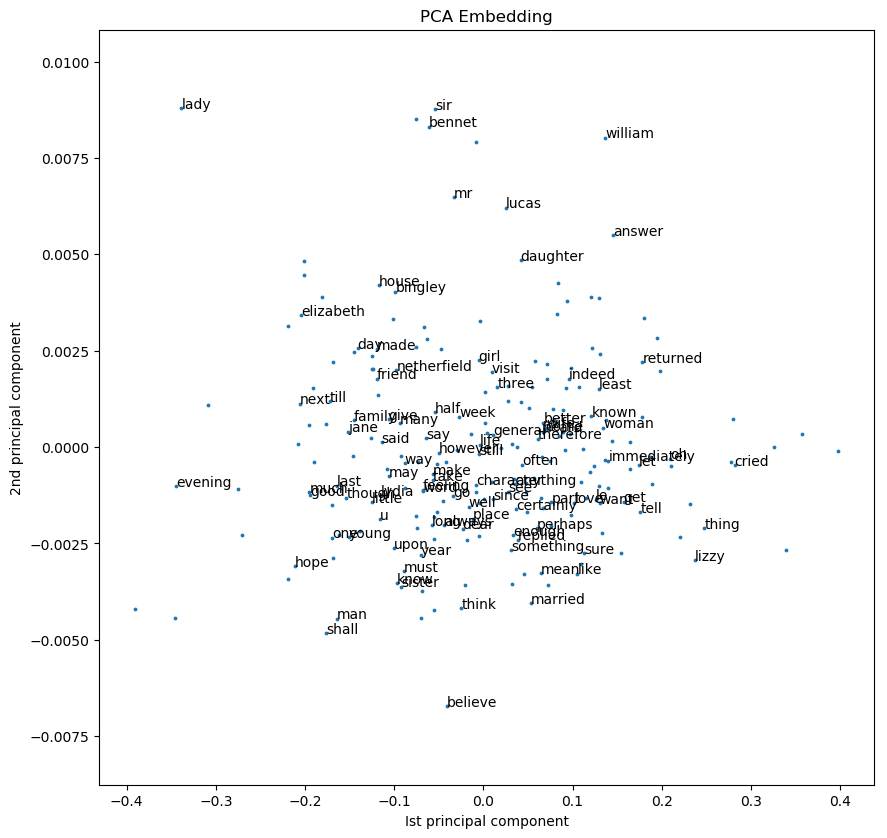

In [18]:
from sklearn import decomposition
# get two principle components of the feature space
pca= decomposition.PCA(n_components=2).fit_transform(X)

# set figure settings
plt.figure(figsize=(10,10),dpi=100)

# save pca values and vocab in dataframe df
df = pd.concat([pd.DataFrame(pca),pd.Series(vocab_tmp)],axis=1)
df.columns = ['x', 'y', 'word']



plt.xlabel("Ist principal component")
plt.ylabel('2nd principal component')


plt.scatter(x=pca[:, 0], y=pca[:, 1],s=3)
for i, word in enumerate(df['word'][0:100]):
    plt.annotate(word, (df['x'].iloc[i], df['y'].iloc[i]))
plt.title("PCA Embedding")
plt.show()


In [19]:
# Get cosine similarity of words
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
model.most_similar('day')

[('room', 0.9999211430549622),
 ('longbourn', 0.9999210238456726),
 ('made', 0.999920129776001),
 ('hope', 0.9999198913574219),
 ('pleasure', 0.9999198317527771),
 ('seen', 0.9999189972877502),
 ('soon', 0.9999184608459473),
 ('morning', 0.9999179840087891),
 ('jane', 0.9999173879623413),
 ('much', 0.999917209148407)]

In [21]:
model.most_similar(positive=['girl','friend'], negative=['man'])

[('made', 0.9998277425765991),
 ('first', 0.9998238682746887),
 ('meryton', 0.9998209476470947),
 ('might', 0.999820351600647),
 ('gentleman', 0.9998177289962769),
 ('time', 0.999817430973053),
 ('seen', 0.9998166561126709),
 ('left', 0.9998157620429993),
 ('therefore', 0.9998157024383545),
 ('pleasure', 0.9998151063919067)]

In [22]:
model.similarity('elizabeth','girl')

0.9998865528125753

In [23]:
model.similarity('lady','girl')

0.9998704606958632

In [24]:
model.doesnt_match("day evening think time".split())

'think'

In [25]:
model.doesnt_match("lady girl mr sister".split())

'mr'